In [1]:
cd /content/drive/MyDrive/AI_Assignment1

/content/drive/MyDrive/AI_Assignment1


In [3]:
#Load data


# Import necessary library
import pandas as pd

#load the dataset csv
df=pd.read_csv("multiple_linear_regression_dataset.csv")

In [4]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [5]:
df.tail()

,age,experience,income
15,41,6,38900
16,58,17,63600
17,23,1,30870
18,44,9,44190
19,37,10,48700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [7]:
df.shape

(20, 3)

In [8]:
df=df.dropna()

In [9]:
df.shape

(20, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [11]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [12]:
df.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


In [13]:
X = df[['age','experience']]
y = df["income"]

In [14]:
# Model building using Sklearn
#Preprocessing
#Split Data, Training - Testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=1)

In [15]:
# Print the shape of splitted data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 2)
(16,)
(4, 2)
(4,)


In [16]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Model instantiation:(Creating LinearRegression Object)
model = LinearRegression()

# Fit the model using fit() function
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#print Coefficient and Intercept
# Print the intercept and coefficients
print(model.intercept_)
print(model.coef_)

31632.483516993747
[ -88.38296292 2008.07976846]


In [18]:
# Making predictions on the testing set
y_pred = model.predict(X_test)

In [19]:
#Compare Acutal and Predict Data
d=pd.DataFrame({'Actual':y_test,"Predict":y_pred})
print(d.head(2))

    Actual       Predict
3    40130  38844.627546
16   63600  60643.627732


<ipython-input-27-cfab94a8ff67>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axs=sns.distplot(y_test,hist=False,color='red',label="Actual Value")
<ipython-input-27-cfab94a8ff67>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False,color='blue',label="Predit Value",ax=axs)


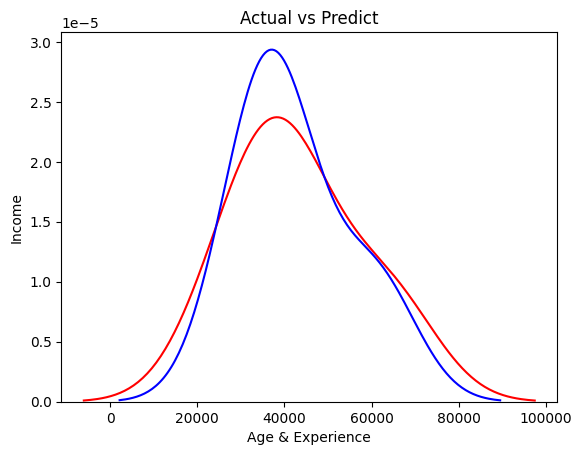

In [27]:
# Model Evaluation with distribution plot

import seaborn as sns
import matplotlib.pyplot as plt

axs=sns.distplot(y_test,hist=False,color='red',label="Actual Value")
sns.distplot(y_pred,hist=False,color='blue',label="Predit Value",ax=axs)
plt.title("Actual vs Predict")
plt.xlabel("Age & Experience")
plt.ylabel("Income")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error",mse)

r_squared = r2_score(y_test, y_pred)
print("R^2 score",r_squared)

Root Mean Square Error 2522.9412727882022
R^2 score 0.9617112208019686


In [22]:
X.min()

age           23
experience     1
dtype: int64

In [23]:
X.max()

age           58
experience    17
dtype: int64

In [28]:
#test with New Data
import numpy as np
new=np.array([24,3]).reshape(-1,2)
predict_income= model.predict(new)
print(predict_income)

[35535.53171238]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
import joblib

# Assuming 'model' is your trained scikit-learn LinearRegression model
joblib.dump(model, 'income_model.pkl')

['income_model.pkl']